# **Installation**

In [1]:
! pip install itables

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.7 MB/s eta 0:00:00


# **Drive Chargement**

In [2]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!ls /content/drive/MyDrive/'Colab Notebooks'/Hopital_projet/exploration


EDA.ipynb


# **Les bibliothèques**

In [4]:
import pandas as pd
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
random.seed(42)
from statsmodels.tsa.seasonal import seasonal_decompose

# **Fonctions**

In [5]:
def corriger_annee(date):
    if date.year == 2025:
        return date.replace(year=2022)
    elif date.year == 2026:
        return date.replace(year=2023)
    elif date.year == 2027:
        return date.replace(year=2024)
    else:
        return date

# **Restructuration Dataset**

In [6]:
file_path = "/content/drive/MyDrive/Colab Notebooks/Hopital_projet/data/dataset_admission.csv"

df = pd.read_csv(file_path)

df

ID_patient Date_heure_admission  Âge   Sexe Jour_semaine      Mois  \
0               1  2022-01-01 01:48:00    3  Femme     Saturday   January   
1               2  2022-01-01 02:04:00    3  Homme     Saturday   January   
2               3  2022-01-01 03:45:00   35  Homme     Saturday   January   
3               4  2022-01-01 04:54:00   12  Femme     Saturday   January   
4               5  2022-01-01 06:29:00   37  Femme     Saturday   January   
...           ...                  ...  ...    ...          ...       ...   
49995       49996  2027-11-24 10:15:00   26  Femme    Wednesday  November   
49996       49997  2027-11-24 11:33:00   94  Homme    Wednesday  November   
49997       49998  2027-11-24 12:34:00   81  Femme    Wednesday  November   
49998       49999  2027-11-24 14:07:00   84  Homme    Wednesday  November   
49999       50000  2027-11-24 15:38:00   17  Femme    Wednesday  November   

        Saison Vacances_scolaires  Météo  Température  ...  \
0        Hiver                Oui  Pluie            8  ...   
1        Hiver                Oui  Pluie            8  ...   
2        Hiver                Oui  Pluie           11  ...   
3        Hiver                Oui  Froid            2  ...   
4        Hiver                Oui  Pluie            6  ...   
...        ...                ...    ...          ...  ...   
49995  Automne                Non   Vent           10  ...   
49996  Automne                Non   Vent           11  ...   
49997  Automne                Non   Vent           17  ...   
49998  Automne                Non  Pluie           12  ...   
49999  Automne                Non   Vent           17  ...   

               Mode d'arrivée   Service d'admission Durée du séjour estimé  \
0                        SAMU              Urgences                      3   
1      Accompagné par famille         Traumatologie                      3   
2          Véhicule personnel              Médecine                      3   
3                        SAMU         Traumatologie                     12   
4            Transport public              Urgences                      1   
...                       ...                   ...                    ...   
49995               Ambulance             Chirurgie                      1   
49996      Véhicule personnel              Urgences                      3   
49997               Ambulance              Urgences                      2   
49998               Ambulance           Réanimation                     22   
49999               Ambulance  Psychiatrie générale                      1   

          Type d'hospitalisation Lits occupes Materiel utilise  \
0          Chirurgie ambulatoire            1               39   
1          Chirurgie ambulatoire            1               17   
2          Chirurgie ambulatoire            1               98   
3      Hospitalisation classique            1              237   
4          Chirurgie ambulatoire            1               19   
...                          ...          ...              ...   
49995      Chirurgie ambulatoire            1                9   
49996      Chirurgie ambulatoire            1               46   
49997      Chirurgie ambulatoire            1               39   
49998            Soins intensifs            1              449   
49999      Chirurgie ambulatoire            1               31   

       Materiel dispo Nb medecin  Nb infirmier  Nb aide soignant  
0             5999961          1             2                 1  
1             5999944          2             2                 1  
2             5999846          2             2                 1  
3             5999609          1             2                 1  
4             5999590          1             2                 1  
...               ...        ...           ...               ...  
49995           13754          1             2                 1  
49996           13708          1             2                 1  
4999

In [7]:
# if not pd.api.types.is_datetime64_dtype(df["Date_heure_admission"]):
#     df["Date_heure_admission"] = pd.to_datetime(df["Date_heure_admission"], errors="coerce")

# len(df)

df["Date_heure_admission"] = pd.to_datetime(df["Date_heure_admission"])
df["Date_admission"] = df["Date_heure_admission"].dt.date
len(df)


50000

In [8]:
df["Date_heure_admission"] = pd.to_datetime(df["Date_heure_admission"])
df["Date_heure_admission"] = df["Date_heure_admission"].apply(corriger_annee)

df


ID_patient Date_heure_admission  Âge   Sexe Jour_semaine      Mois  \
0               1  2022-01-01 01:48:00    3  Femme     Saturday   January   
1               2  2022-01-01 02:04:00    3  Homme     Saturday   January   
2               3  2022-01-01 03:45:00   35  Homme     Saturday   January   
3               4  2022-01-01 04:54:00   12  Femme     Saturday   January   
4               5  2022-01-01 06:29:00   37  Femme     Saturday   January   
...           ...                  ...  ...    ...          ...       ...   
49995       49996  2024-11-24 10:15:00   26  Femme    Wednesday  November   
49996       49997  2024-11-24 11:33:00   94  Homme    Wednesday  November   
49997       49998  2024-11-24 12:34:00   81  Femme    Wednesday  November   
49998       49999  2024-11-24 14:07:00   84  Homme    Wednesday  November   
49999       50000  2024-11-24 15:38:00   17  Femme    Wednesday  November   

        Saison Vacances_scolaires  Météo  Température  ...  \
0        Hiver                Oui  Pluie            8  ...   
1        Hiver                Oui  Pluie            8  ...   
2        Hiver                Oui  Pluie           11  ...   
3        Hiver                Oui  Froid            2  ...   
4        Hiver                Oui  Pluie            6  ...   
...        ...                ...    ...          ...  ...   
49995  Automne                Non   Vent           10  ...   
49996  Automne                Non   Vent           11  ...   
49997  Automne                Non   Vent           17  ...   
49998  Automne                Non  Pluie           12  ...   
49999  Automne                Non   Vent           17  ...   

        Service d'admission Durée du séjour estimé     Type d'hospitalisation  \
0                  Urgences                      3      Chirurgie ambulatoire   
1             Traumatologie                      3      Chirurgie ambulatoire   
2                  Médecine                      3      Chirurgie ambulatoire   
3             Traumatologie                     12  Hospitalisation classique   
4                  Urgences                      1      Chirurgie ambulatoire   
...                     ...                    ...                        ...   
49995             Chirurgie                      1      Chirurgie ambulatoire   
49996              Urgences                      3      Chirurgie ambulatoire   
49997              Urgences                      2      Chirurgie ambulatoire   
49998           Réanimation                     22            Soins intensifs   
49999  Psychiatrie générale                      1      Chirurgie ambulatoire   

      Lits occupes Materiel utilise Materiel dispo  Nb medecin Nb infirmier  \
0                1               39        5999961           1            2   
1                1               17        5999944           2            2   
2                1               98        5999846           2            2   
3                1              237        5999609           1            2   
4                1               19        5999590           1            2   
...            ...              ...            ...         ...          ...   
49995            1                9          13754           1            2   
49996            1               46          13708           1            2   
49997            1               39          13669           1            2   
49998            1              449          13220           2            3   
49999            1               31          13189           1            2   

       Nb aide soignant  Date_admission  
0                     1      2022-01-01  
1                     1      2022-01-01  
2                     1      2022-01-01  
3                     1      2022-01-01  
4                     1      2022-01-01  
...                 ...             ...  
49995                 1      2027-11-24  
49996                 1      2027-11-24  
49997                 1      2027-11-

In [9]:
df["Date_admission"] = df["Date_heure_admission"].dt.date

df["Jour"] = df["Date_heure_admission"].dt.day
df["Annee"] = df["Date_heure_admission"].dt.year

admission_df = df.groupby("Date_admission").agg({
    "Jour_semaine": "first",
    "Jour": "first",
    "Mois": "first",
    "Annee": 'first',
    "Saison": "first",
    "Vacances_scolaires": "first",
    "Température": "mean",
    "Météo": lambda x: x.mode()[0] if not x.mode().empty else None,
    "Lits occupes": "sum",
    "Materiel utilise": "sum",
    "Nb medecin": "sum",
    "Nb infirmier": "sum",
    "Nb aide soignant": "sum" ,
    "Evenement_Special": "first"
}).reset_index()

admission_df["Température"] = admission_df["Température"].round().astype(int)
admission_df["Nb medecin"] = (admission_df["Nb medecin"] / 4).round().astype(int)
admission_df["Nb infirmier"] = (admission_df["Nb infirmier"] / 4).round().astype(int)
admission_df["Nb aide soignant"] = (admission_df["Nb aide soignant"] / 4).round().astype(int)

admission_df["Nombre_admissions"] = df.groupby("Date_admission").size().values
admission_df = admission_df.sort_values(by="Date_admission")

print(admission_df.shape)
admission_df

(1096, 16)


Date_admission Jour_semaine  Jour      Mois  Annee Saison  \
0        2022-01-01     Saturday     1   January   2022  Hiver   
1        2022-01-02       Sunday     2   January   2022  Hiver   
2        2022-01-03       Monday     3   January   2022  Hiver   
3        2022-01-04      Tuesday     4   January   2022  Hiver   
4        2022-01-05    Wednesday     5   January   2022  Hiver   
...             ...          ...   ...       ...    ...    ...   
1091     2024-12-27       Friday    27  December   2024  Hiver   
1092     2024-12-28     Saturday    28  December   2024  Hiver   
1093     2024-12-29       Sunday    29  December   2024  Hiver   
1094     2024-12-30       Monday    30  December   2024  Hiver   
1095     2024-12-31      Tuesday    31  December   2024  Hiver   

     Vacances_scolaires  Température  Météo  Lits occupes  Materiel utilise  \
0                   Oui            3  Pluie            44              5129   
1                   Non            2  Froid            46              5361   
2                   Non            2   Gris            57             10157   
3                   Non            3  Pluie            48              5373   
4                   Non            3   Gris            36              3963   
...                 ...          ...    ...           ...               ...   
1091                Non            2  Froid            31              3496   
1092                Non            2   Gris            20              1959   
1093                Non            4  Pluie            17              2545   
1094                Non            0  Froid            33              4078   
1095                Non            3  Pluie            27              3481   

      Nb medecin  Nb infirmier  Nb aide soignant   Evenement_Special  \
0             22            25                19  Épidémie de grippe   
1             24            31                21  Épidémie de grippe   
2             29            38                30  Épidémie de grippe   
3             22            29                21               Aucun   
4             15            20                16  Épidémie de grippe   
...          ...           ...               ...                 ...   
1091          14            18                15  Épidémie de grippe   
1092           8            12                 8  Épidémie de grippe   
1093           8            10                 8               Aucun   
1094          16            20                14  Épidémie de grippe   
1095          12            17                12               Aucun   

      Nombre_admissions  
0                    44  
1                    46  
2                    57  
3                    48  
4                    36  
...                 ...  
1091                 31  
1092                 20  
1093                 17  
1094                 33  
1095                 27  

[1096 rows x 16 columns]

# **Statistique descriptive**

In [10]:
stats_des = admission_df.describe()
stats_des

Jour        Annee  Température  Lits occupes  Materiel utilise  \
count  1096.000000  1096.000000  1096.000000   1096.000000       1096.000000   
mean     15.732664  2023.000912    14.097628     45.620438       5462.418796   
std       8.805388     0.817055     9.284865     12.226706       1832.195212   
min       1.000000  2022.000000    -2.000000     15.000000       1331.000000   
25%       8.000000  2022.000000    11.000000     36.000000       4205.250000   
50%      16.000000  2023.000000    13.000000     45.000000       5225.500000   
75%      23.000000  2024.000000    25.000000     53.000000       6513.500000   
max      31.000000  2024.000000    30.000000     79.000000      12292.000000   

        Nb medecin  Nb infirmier  Nb aide soignant  Nombre_admissions  
count  1096.000000   1096.000000       1096.000000        1096.000000  
mean     19.914234     26.001825         19.149635          45.620438  
std       4.882168      6.666895          4.759174          12.226706  
min       6.000000      8.000000          6.000000          15.000000  
25%      16.000000     21.000000         16.000000          36.000000  
50%      19.000000     26.000000         18.000000          45.000000  
75%      23.000000     30.000000         22.000000          53.000000  
max      38.000000     44.000000         34.000000          79.000000

### **📊 Résumé des statistiques :**
- **Température** :  
  - Moyenne : **14°C**  
  - Min/Max : **-2°C à 30°C**
- **Nombre de lits occupés par jour** :  
  - Moyenne : **46 lits**
  - Min/Max : **15 à 79 lits**
- **Matériel utilisé** :  
  - Moyenne : **5462 unités/jour**
  - Min/Max : **1331 à 12300 unités**
- **Effectif médical moyen par jour** :  
  - **Médecins** : **1 à 3**
  - **Infirmiers** : **2 à 3**
  - **Aides-soignants** : **1 à 3**
- **Admissions quotidiennes** :  
  - Moyenne : **46 admissions/jour**
  - Min/Max : **15 à 78 admissions/jour**

# **Analyse des tendances**

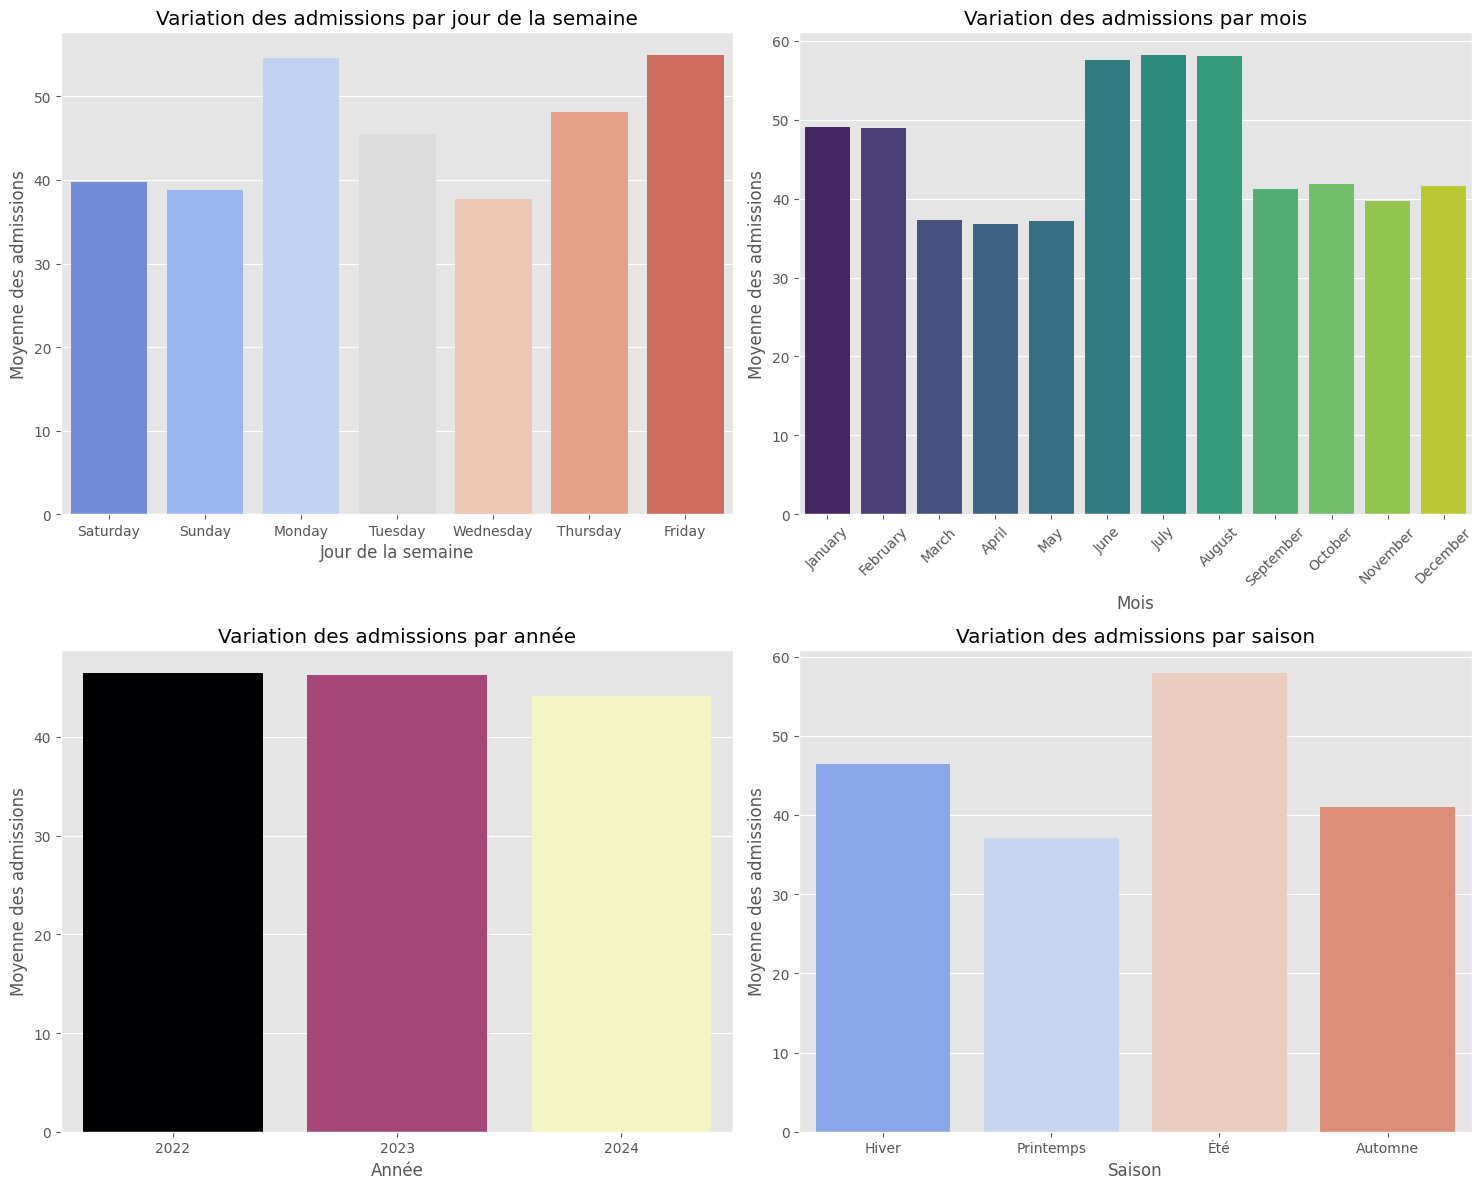

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.barplot(x="Jour_semaine", y="Nombre_admissions", hue="Jour_semaine", data=admission_df, ax=axes[0, 0], palette="coolwarm", legend=False, errorbar=None)
axes[0, 0].set_title("Variation des admissions par jour de la semaine")
axes[0, 0].set_xlabel("Jour de la semaine")
axes[0, 0].set_ylabel("Moyenne des admissions")

sns.barplot(x="Mois", y="Nombre_admissions", hue="Mois", data=admission_df, ax=axes[0, 1], palette="viridis", legend=False, errorbar=None)
axes[0, 1].set_title("Variation des admissions par mois")
axes[0, 1].set_xlabel("Mois")
axes[0, 1].set_ylabel("Moyenne des admissions")
axes[0, 1].tick_params(axis='x', rotation=45)

sns.barplot(x="Annee", y="Nombre_admissions", hue="Annee", data=admission_df, ax=axes[1, 0], palette="magma", legend=False, errorbar=None)
axes[1, 0].set_title("Variation des admissions par année")
axes[1, 0].set_xlabel("Année")
axes[1, 0].set_ylabel("Moyenne des admissions")

sns.barplot(x="Saison", y="Nombre_admissions", hue="Saison", data=admission_df, ax=axes[1, 1], palette="coolwarm", legend=False, errorbar=None)
axes[1, 1].set_title("Variation des admissions par saison")
axes[1, 1].set_xlabel("Saison")
axes[1, 1].set_ylabel("Moyenne des admissions")

plt.tight_layout()

plt.show()


### **📊Variations des Admissions Hospitalières**  

#### **1️⃣ Admissions par Jour de la Semaine 📅**  
- **Les lundis et vendredis ont le plus d'admissions**.  
  👉 Cela peut être dû à un afflux après le week-end et avant le début du week-end suivant.  
- **Mardi et mercredi ont les admissions les plus faibles**.  
  👉 Ce sont peut-être des jours moins critiques en termes d’urgence médicale.  

🔍 **Interprétation** :  
- L’affluence en début et fin de semaine pourrait être liée aux reports de consultations et aux urgences qui s’accumulent après le week-end.  

---

#### **2️⃣ Admissions par Mois 📆**  
- **Juin, Juillet et Août ont le plus d’admissions**.  
  👉 Cela coïncide avec l’été, qui est souvent une période d’accidents, de déshydratation, et d’autres urgences liées à la chaleur.  
- **Mars, Avril et Mai ont les admissions les plus faibles**.  
  👉 Moins de pathologies saisonnières et de virus en circulation après l’hiver.  

🔍 **Interprétation** :  
- La hausse en été peut être liée aux **accidents de vacances, coups de chaleur, pathologies liées aux températures élevées**.  
- L’hiver reste une période d’admissions élevées en raison des **maladies respiratoires** liés à la grippe.  

---

#### **3️⃣ Admissions par Année 📈**  
- Les admissions sont relativement stables entre **2022, 2023 et 2024**.  
  👉 Pas de grande fluctuation dans l’évolution des admissions hospitalières.  

🔍 **Interprétation** :  
- La charge hospitalière semble **constante sur les trois années**, suggérant une gestion stable des admissions sans événements exceptionnels comme une pandémie.  

---

#### **4️⃣ Admissions par Saison ❄️🌸☀️🍂**  
- **L'été est la saison avec le plus d’admissions**.  
  👉 Accidents de loisirs, coups de chaleur, pathologies liées aux voyages/vacances.  
- **L'hiver arrive en deuxième position**.  
  👉 Augmentation des maladies respiratoires (grippe, bronchiolites, pneumonies).  
- **Le printemps et l'automne enregistrent moins d’admissions**.  
  👉 Ces saisons sont plus tempérées, avec moins de stress sur le système de santé.  

🔍 **Interprétation** :  
- **L’été et l’hiver sont des périodes critiques pour l’hôpital**.  
- **L’hôpital doit renforcer ses effectifs pendant ces saisons** pour faire face à la demande.  

---

📌 **Recommandations pour l’hôpital** :  
✅ **Renforcer les effectifs le lundi et le vendredi** pour absorber l’afflux.  
✅ **Prévoir des ressources supplémentaires en été et en hiver** (services d’urgence, lits, personnel).  
✅ **Analyser plus en détail les causes des admissions estivales** pour mieux anticiper les besoins.  

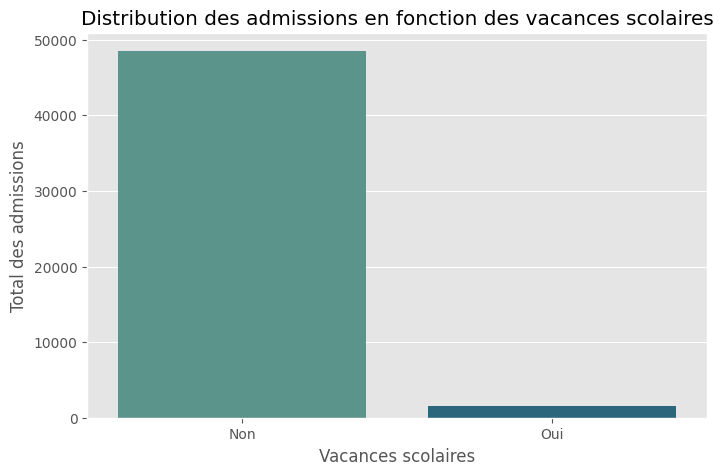

In [12]:
vacances_admissions = admission_df.groupby("Vacances_scolaires", as_index=False)["Nombre_admissions"].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x="Vacances_scolaires", y="Nombre_admissions", hue="Vacances_scolaires", data=vacances_admissions, palette="crest")

plt.title("Distribution des admissions en fonction des vacances scolaires")
plt.xlabel("Vacances scolaires")
plt.ylabel("Total des admissions")
plt.show()


### **📊 Distribution des Admissions en Fonction des Vacances Scolaires :**
- **Le nombre d’admissions est beaucoup plus élevé en dehors des vacances scolaires** ("Non") que pendant les vacances ("Oui").
- L’écart est significatif : **les admissions hors vacances sont nettement supérieures** à celles durant les vacances.

---

#### **2️⃣ Explications possibles :**
📌 **Moins de stress et de pression en vacances :**  
- En période scolaire, les **enfants et adultes** sont soumis à un rythme plus intense (école, travail, transports, fatigue). Cela peut engendrer **plus d'urgences médicales liées au stress, aux infections ou aux maladies chroniques**.  
- Pendant les vacances, le rythme est plus détendu, ce qui pourrait **réduire les admissions liées au stress et à la fatigue**.

📌 **Moins d'infections virales en vacances :**  
- Les écoles et lieux de travail favorisent la transmission des virus (grippe, angine, gastro).  
- Pendant les vacances, **les interactions sont moindres**, ce qui peut réduire les infections et les consultations d’urgence.

📌 **Fermeture partielle des services médicaux :**  
- Certains cabinets médicaux et spécialistes sont fermés en vacances.  
- Cela peut réduire les admissions pour des soins programmés, mais aussi retarder certaines urgences qui seront traitées après la rentrée.

📌 **Changement des habitudes :**  
- Moins de déplacements domicile-travail signifie **moins d’accidents de transport**.  
- Les **urgences liées au travail et aux écoles** (ex. blessures, malaises) diminuent en période de vacances.

---

#### **3️⃣ Conséquences et recommandations :**
✅ **Renforcer les effectifs en dehors des vacances scolaires**  
➡️ Puisque la demande est beaucoup plus élevée, il faut **plus de personnel et de ressources** durant les périodes scolaires.  

✅ **Surveiller l'impact de la rentrée**  
➡️ Après les vacances, il peut y avoir une **hausse brutale des admissions**, nécessitant **une meilleure anticipation des flux**.  

✅ **Analyser les types d’admissions selon la période**  
➡️ Il serait intéressant de voir **quels types de pathologies dominent en vacances vs hors vacances** (ex. plus d’accidents de loisirs en vacances ? Plus d’infections hors vacances ?).  


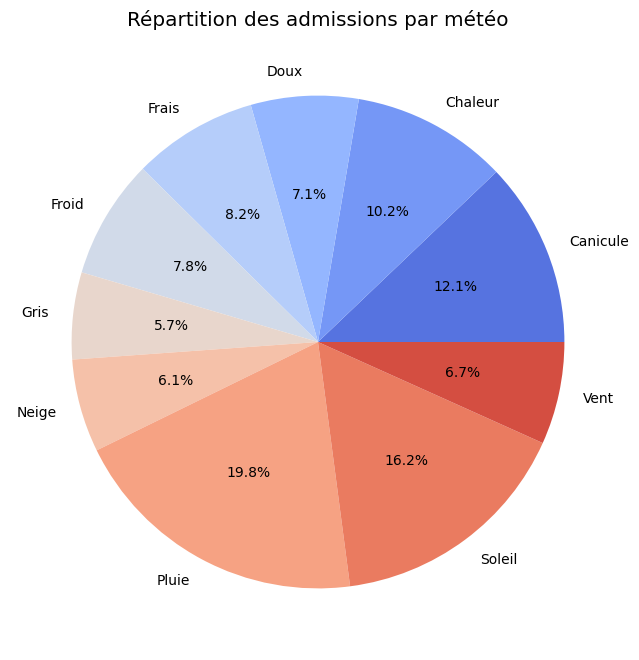

In [13]:
plt.figure(figsize=(8, 8))
admissions_meteo = admission_df.groupby("Météo")["Nombre_admissions"].sum()

plt.pie(admissions_meteo, labels=admissions_meteo.index, autopct='%1.1f%%', colors=sns.color_palette("coolwarm", len(admissions_meteo)))

plt.title("Répartition des admissions par météo")
plt.show()


### **📊Répartition des Admissions par Météo**  

Le camembert représente la distribution des admissions en fonction des **conditions météorologiques**.

#### **1️⃣ Observations principales 🌤️🌧️❄️**  
- **Les journées de pluie enregistrent le plus d’admissions (~19.8%)**  
  👉 Peut être lié aux **accidents de glissade, problèmes respiratoires (humidité élevée), ou infections saisonnières.**  
- **Les journées ensoleillées (16.2%) et de canicule (12.1%) sont également associées à un fort nombre d’admissions.**  
  👉 Explication possible : **coups de chaleur, déshydratation, activités extérieures accrues entraînant des blessures.**  
- **Les périodes de froid (froid, neige, gris) ont un impact moindre sur les admissions (~5-8%).**  
  👉 Les gens sortent moins, ce qui réduit les accidents. Mais cela **n’empêche pas les admissions liées aux maladies saisonnières (grippe, bronchite, pneumonie).**  
- **Les jours de vent enregistrent l’un des taux d’admissions les plus bas (~6.7%).**  
  👉 Moins d’incidence directe sur la santé par rapport aux autres conditions météorologiques.  

---

### **📌 Implications et recommandations 🚀**
✅ **Anticiper les urgences lors des périodes de pluie et de chaleur extrême.**  
➡️ **Équiper les hôpitaux pour gérer les conséquences des canicules (climatisation, hydratation des patients fragiles).**  
➡️ **Prévoir du personnel supplémentaire en cas de fortes pluies pour gérer les accidents et infections.**  

✅ **Surveiller les maladies respiratoires en hiver malgré des admissions plus faibles.**  
➡️ **Les admissions hivernales peuvent être moins nombreuses mais plus graves (pathologies chroniques, pneumonies, grippe).**  

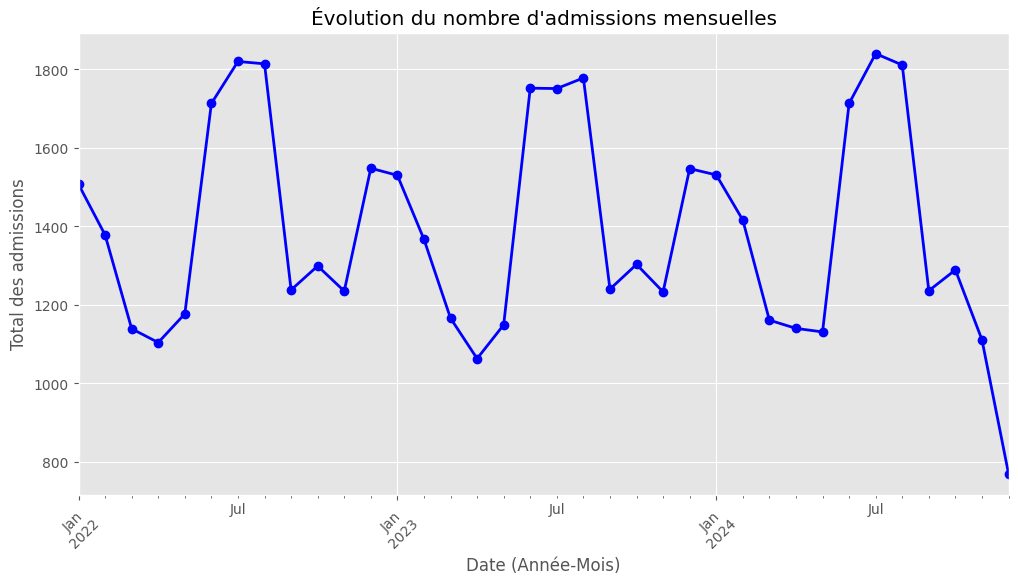

In [14]:
admission_df["Date_admission"] = pd.to_datetime(admission_df["Date_admission"])

admissions_mensuelles = admission_df.groupby(admission_df["Date_admission"].dt.to_period('M'))["Nombre_admissions"].sum()

plt.figure(figsize=(12, 6))
admissions_mensuelles.plot(kind='line', marker='o', color='b', linewidth=2)

plt.title("Évolution du nombre d'admissions mensuelles")
plt.xlabel("Date (Année-Mois)")
plt.ylabel("Total des admissions")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


### **📊Variation des Admissions dans le Temps**  


### **1️⃣ Observation des Tendances 📈**
- On observe **des hausses et des baisses cycliques**, ce qui suggère **une saisonnalité** dans les admissions.  
- **Les admissions augmentent fortement à certains moments**, puis redescendent brusquement, formant des **pics et creux récurrents**.  
- Globalement, il n’y a **pas de tendance clairement croissante ou décroissante** sur plusieurs années.

---

### **2️⃣ Analyse de la Saisonnalité 🌤️❄️**
- **Des pics sont visibles chaque année aux mêmes périodes**, notamment **vers juin-juillet**.  
  👉 Cela pourrait correspondre à **une hausse estivale des admissions** (accidents, canicules, maladies cardiovasculaires).  
- **Des creux sont souvent visibles autour de janvier-février**.  
  👉 Peut-être dû à une **réduction des activités extérieures en hiver**, sauf pour les maladies respiratoires.  

📌 **Hypothèse :** Il existe une **saisonnalité annuelle** avec des pics en été et une baisse en hiver.  

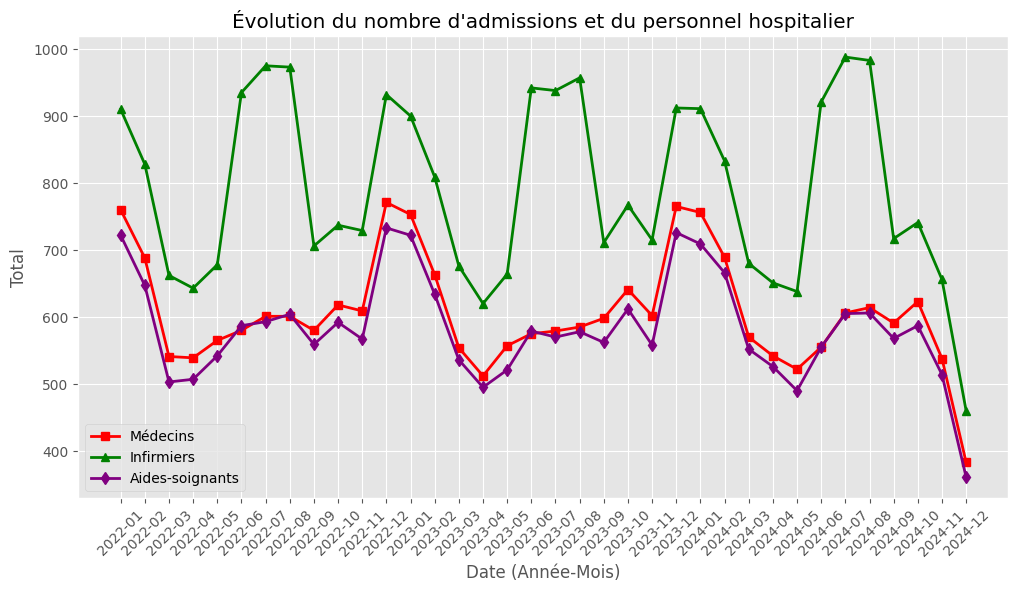

In [15]:
admissions_personnel_mensuelles = admission_df.groupby(admission_df["Date_admission"].dt.to_period('M')).agg({
   # "Nombre_admissions": "mean",
    "Nb medecin": "sum",
    "Nb infirmier": "sum",
    "Nb aide soignant": "sum"
})
plt.figure(figsize=(12, 6))

plt.plot(admissions_personnel_mensuelles.index.astype(str),
         admissions_personnel_mensuelles["Nb medecin"],
         marker='s', color='r', linewidth=2, label="Médecins")

plt.plot(admissions_personnel_mensuelles.index.astype(str),
         admissions_personnel_mensuelles["Nb infirmier"],
         marker='^', color='g', linewidth=2, label="Infirmiers")

plt.plot(admissions_personnel_mensuelles.index.astype(str),
         admissions_personnel_mensuelles["Nb aide soignant"],
         marker='d', color='purple', linewidth=2, label="Aides-soignants")

# Configuration du graphique
plt.title("Évolution du nombre d'admissions et du personnel hospitalier")
plt.xlabel("Date (Année-Mois)")
plt.ylabel("Total")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Affichage du graphique
plt.show()


### **📊Évolution du Personnel Hospitalier**  


### **1️⃣ Observations générales 📈**  
- **Les infirmiers sont le personnel le plus nombreux**, suivis des **médecins et aides-soignants**.  
- **Des variations saisonnières sont visibles**, avec des baisses et hausses régulières dans les effectifs.  
- **Les pics d’augmentation du personnel correspondent souvent aux hausses d’admissions**, ce qui suggère une **adaptation du personnel en fonction de la demande hospitalière**.

---

### **2️⃣ Corrélation entre Admissions et Personnel**  
- **Les effectifs (surtout infirmiers) augmentent lors des périodes de forte demande**, notamment en hiver et en été.  
- **Certains creux de personnel correspondent à des baisses d’admissions**, ce qui pourrait être dû à **des congés, des rotations d’équipes ou une gestion anticipée des besoins**.  
- **Les infirmiers connaissent les plus grandes fluctuations**, probablement car ils représentent **la plus grande partie du personnel soignant et sont plus flexibles en effectif**.  

📌 **Hypothèse :**  
- L'hôpital **ajuste le nombre de médecins, infirmiers et aides-soignants en fonction des admissions**, mais la **réactivité n'est pas toujours immédiate**.  
- Il peut y avoir **un décalage entre les hausses d’admissions et l’ajustement du personnel**, ce qui peut causer des tensions.  


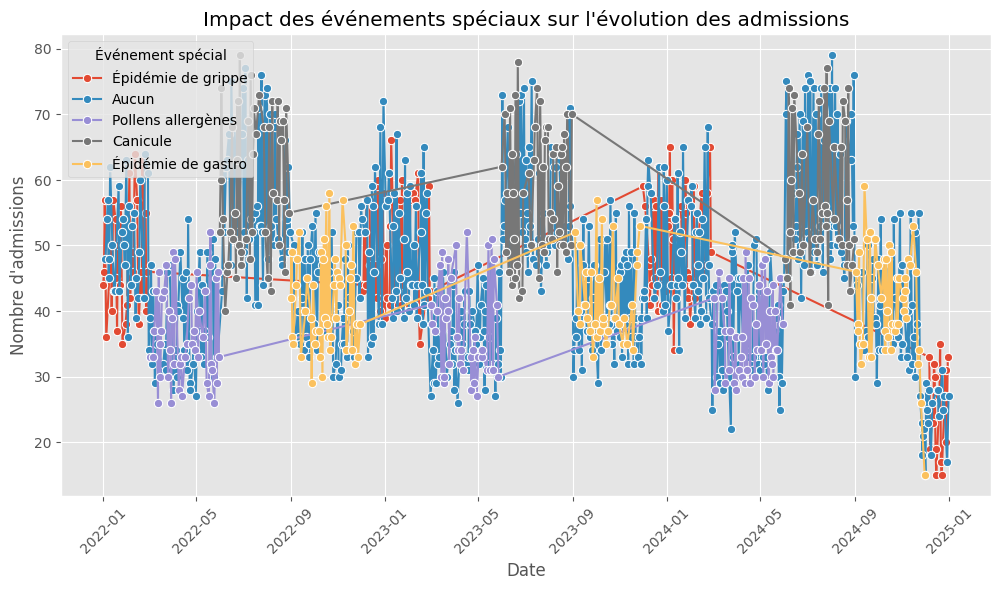

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="Date_admission", y="Nombre_admissions", data=admission_df, hue="Evenement_Special", marker="o")

plt.title("Impact des événements spéciaux sur l'évolution des admissions")
plt.xlabel("Date")
plt.ylabel("Nombre d'admissions")
plt.xticks(rotation=45)
plt.legend(title="Événement spécial")
plt.grid(True)
plt.show()


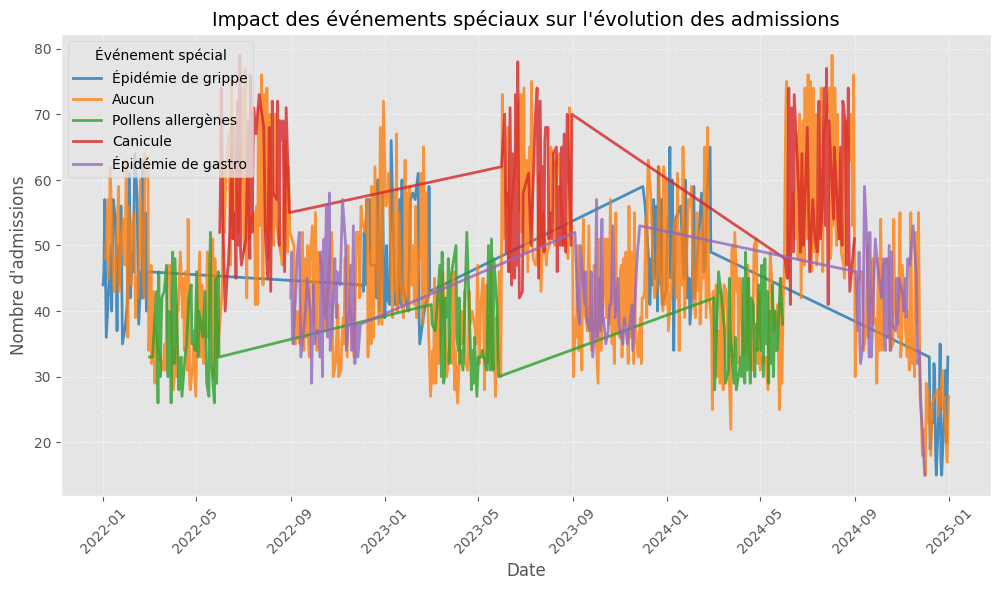

In [17]:
# Amélioration de la lisibilité du graphique

plt.figure(figsize=(12, 6))

# Utiliser une courbe lissée au lieu d'un scatterplot
sns.lineplot(
    x="Date_admission",
    y="Nombre_admissions",
    hue="Evenement_Special",
    data=admission_df,
    palette="tab10",
    linewidth=2,
    alpha=0.8  # Réduction de l'opacité pour améliorer la clarté
)

# Personnalisation du graphique
plt.title("Impact des événements spéciaux sur l'évolution des admissions", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Nombre d'admissions", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Événement spécial", fontsize=10, loc="upper left")
plt.grid(True, linestyle="--", alpha=0.5)

# Afficher le graphique optimisé
plt.show()


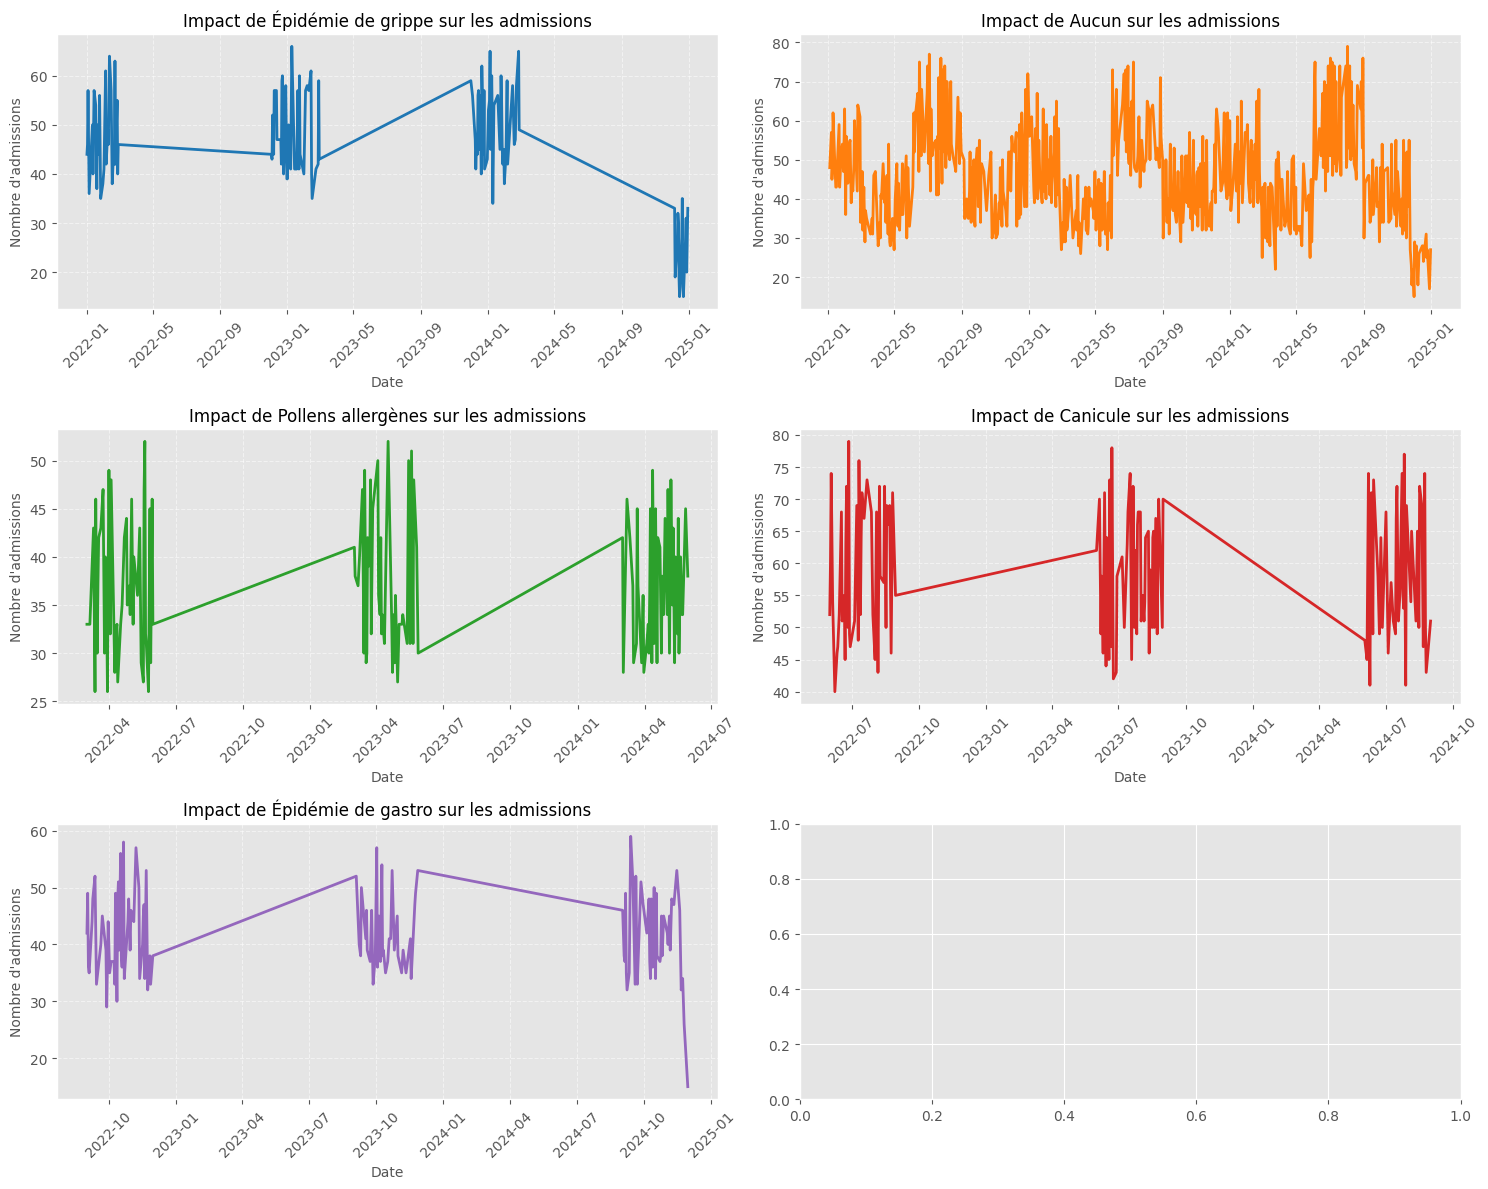

In [18]:

evenements_uniques = admission_df["Evenement_Special"].unique()

# Création de la figure avec sous-graphiques
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Génération d'une palette de couleurs distinctes
couleurs = sns.color_palette("tab10", len(evenements_uniques))

for i, (evenement, couleur) in enumerate(zip(evenements_uniques, couleurs)):
    ax = axes[i // 2, i % 2]

    df_event = admission_df[admission_df["Evenement_Special"] == evenement]

    sns.lineplot(
        x="Date_admission",
        y="Nombre_admissions",
        data=df_event,
        ax=ax,
        linewidth=2,
        color=couleur  # Assignation de la couleur
    )

    ax.set_title(f"Impact de {evenement} sur les admissions", fontsize=12)
    ax.set_xlabel("Date", fontsize=10)
    ax.set_ylabel("Nombre d'admissions", fontsize=10)
    ax.tick_params(axis="x", rotation=45)
    ax.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()




### **📊Impact des Événements Spéciaux sur les Admissions**  

### **📌 Observations Générales**
1. **Épidémie de grippe** 🦠  
   - Fortes augmentations visibles en hiver.  
   - Diminution progressive en dehors des périodes épidémiques.  

2. **Pollens allergènes** 🌿  
   - Fluctuations importantes au printemps et en été.  
   - Possible lien avec les crises d’asthme et allergies saisonnières.  

3. **Canicule** 🔥  
   - Pics nets pendant l’été.  
   - Baisse significative en dehors des périodes de chaleur.  

4. **Épidémie de gastro** 🤢  
   - Augmentations visibles en hiver et début de l’année.  
   - Peut être liée à la propagation des infections digestives.  

5. **Aucun événement** 🚫  
   - Fluctuation plus stable, mais des pics apparaissent parfois.  
   - D’autres facteurs peuvent influencer les admissions (accidents, autres pathologies).  

### **📌 Interprétations et Hypothèses**
✅ **Les admissions sont fortement influencées par les événements climatiques et épidémiologiques.**  
✅ **Les saisons jouent un rôle clé dans la répartition des admissions** (ex. grippe en hiver, canicule en été).  
✅ **Certains événements ont un impact plus marqué que d'autres** (grippe et canicule notamment).  

## **Etude de saisonnalité**

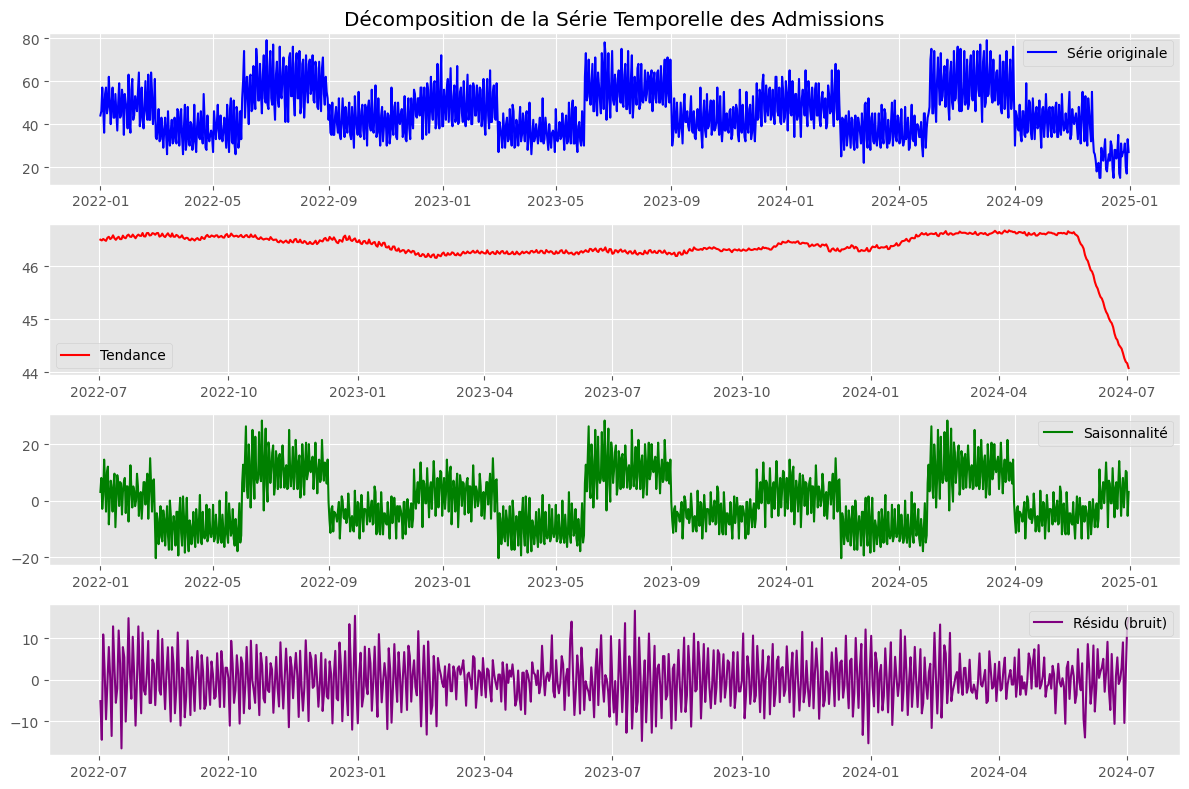

In [19]:
admissions_series = admission_df.set_index("Date_admission")["Nombre_admissions"]

decomposition = seasonal_decompose(admissions_series, model="additive", period=365)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(admissions_series, label="Série originale", color="blue")
plt.legend()
plt.title("Décomposition de la Série Temporelle des Admissions")

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label="Tendance", color="red")
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label="Saisonnalité", color="green")
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label="Résidu (bruit)", color="purple")
plt.legend()

plt.tight_layout()
plt.show()


### **📊 Saisonnalité des Admissions**  


### **📌 1️⃣ Analyse de la Tendance**
- **Tendance globalement stable**, sauf une forte baisse récente (fin 2024).  
- Cela pourrait être dû à une **réduction des admissions**, un **manque de données récentes**, ou un **événement majeur impactant les admissions**.  


### **📌 2️⃣ Analyse de la Saisonnalité**  
- **Des pics et des creux récurrents** indiquent une **saisonnalité annuelle**.  
- Les admissions semblent **plus élevées en certaines périodes de l'année** (probablement en hiver et en été).  
- La **saisonnalité est forte**, ce qui signifie que certains mois reviennent régulièrement avec un nombre d’admissions plus élevé.  

### **📌 3️⃣ Analyse du Bruit (Résidu)**  
- Le bruit (résidu) montre des **fluctuations aléatoires**, ce qui indique qu'il y a **des événements non pris en compte** par la tendance et la saisonnalité.  
- **Le bruit est plus élevé à certaines périodes**, ce qui pourrait correspondre à des **événements imprévus** (crises sanitaires, grèves, catastrophes naturelles).  

### **📌 Conclusion 🚀**
✅ **Les admissions hospitalières suivent une saisonnalité claire**, avec des pics à certaines périodes de l’année.  
✅ **La tendance est globalement stable**, mais une baisse récente pourrait nécessiter une vérification des données.  
✅ **Le bruit indique des événements non expliqués**, qui mériteraient une analyse plus approfondie.

In [20]:
admission_df.to_csv("/content/drive/MyDrive/Colab Notebooks/Hopital_projet/data/model_data.csv", index=False, encoding='utf-8')